In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
import string
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## DRILL: Prepare the Data

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  

__Robbery and Murder__ are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  

Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [49]:
columns = ['City', 'Population', 'Violent crime',
'Murder and nonnegligent manslaughter',
'Rape (revised definition)', 'Rape (legacy definition)',
'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
'Larceny- theft', 'Motor vehicle theft', 'Arson3']

df = pd.read_csv('new_york_crime_2013.csv', low_memory=False, dtype={'Population': int},  thousands=',',)
df.columns = columns # original columns have \n etc

### Make Rape and Murder binary

In [52]:
df.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [57]:
df['rape_binary'] = df['Rape (legacy definition)'].apply(lambda r: 1 if r > 0 else 0)
df.drop(columns=['Rape (legacy definition)', 'Rape (revised definition)'], inplace=True)
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,rape_binary
0,Adams Village,1861,0,0,0,0,12,2,10,0,0.0,0
1,Addison Town and Village,2577,3,0,0,3,24,3,20,1,0.0,0
2,Akron Village,2846,3,0,0,3,16,1,15,0,0.0,0
3,Albany,97956,791,8,227,526,4090,705,3243,142,NaN,1
4,Albion Village,6388,23,0,4,16,223,53,165,5,NaN,1
5,Alfred Village,4089,5,0,3,2,46,10,36,0,NaN,0
6,Allegany Village,1781,3,0,0,3,10,0,10,0,0.0,0
7,Amherst Town,118296,107,1,31,68,2118,204,1882,32,3.0,1
8,Amityville Village,9519,9,0,4,3,210,16,188,6,1.0,1
9,Amsterdam,18182,30,0,12,18,405,99,291,15,0.0,0


In [59]:
df['murder_binary'] = df['Murder and nonnegligent manslaughter'].apply(lambda m: 1 if m > 0 else 0)
df.drop(columns=['Murder and nonnegligent manslaughter'], inplace=True)
df

,City,Population,Violent crime,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,rape_binary,murder_binary
0,Adams Village,1861,0,0,0,12,2,10,0,0.0,0,0
1,Addison Town and Village,2577,3,0,3,24,3,20,1,0.0,0,0
2,Akron Village,2846,3,0,3,16,1,15,0,0.0,0,0
3,Albany,97956,791,227,526,4090,705,3243,142,NaN,1,1
4,Albion Village,6388,23,4,16,223,53,165,5,NaN,1,0
5,Alfred Village,4089,5,3,2,46,10,36,0,NaN,0,0
6,Allegany Village,1781,3,0,3,10,0,10,0,0.0,0,0
7,Amherst Town,118296,107,31,68,2118,204,1882,32,3.0,1,1
8,Amityville Village,9519,9,4,3,210,16,188,6,1.0,1,0
9,Amsterdam,18182,30,12,18,405,99,291,15,0.0,0,0


## Explore Data a bit

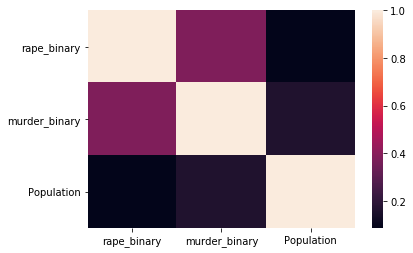

In [62]:
sns.heatmap(df[['rape_binary', 'murder_binary', 'Population']].corr())
plt.show()

### A few cities stand out in population, with New York a huge anomaly

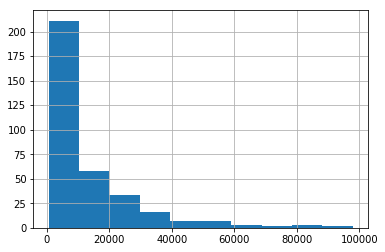

In [75]:
df[df['Population'] < 100000]['Population'].hist()

In [74]:
df[df['Population'] > 100000].sort_values('Population')

,City,Population,Violent crime,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,rape_binary,murder_binary
7,Amherst Town,118296,107,31,68,2118,204,1882,32,3.0,1,1
310,Syracuse,143834,1192,400,696,6473,1781,4298,394,57.0,1,1
346,Yonkers,199134,1036,390,615,2368,470,1662,236,10.0,1,1
272,Rochester,210562,2107,918,1055,10051,2587,6855,609,132.0,1,1
35,Buffalo,258789,3249,1322,1735,12491,3458,8076,957,NaN,1,1
216,New York,8396126,52384,19170,31767,141971,16606,117931,7434,NaN,1,1
